# The Multilayer Neural Network Model

## Part 1: Set up

First we must impor packages and the dataset for this model, Fashion MNIST, which is simliar to the original MNIST except that it provides images of a variety of clothing items, rather than digits.

In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Using keras module to import fashion data 
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The code below demonstrates the shape of each subset of the data. The training data, of which there are 60,000 entries, each 28 x 28 pixels, and the testing data, with 10,000 entries, each also 28 x 28 pixels.

In [9]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[7]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 2

Additionally, the matrix above indicates the shade of each pixel in the image, on a scale of 0-255, with lower numbers representing darker shades and higher numbers representing lighter ones.

---
Below is an example of the Fashion MNIST images, specifically it is categroized as a 'pullover'.

train_y[7] = 2 



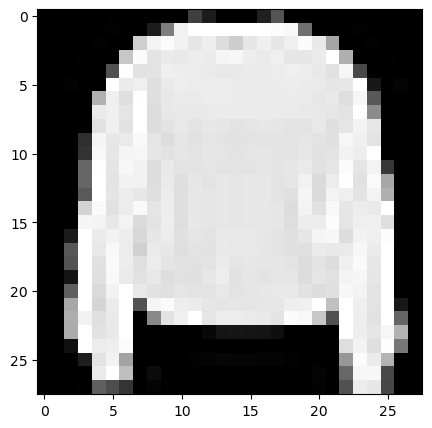

In [8]:
print(f"{train_y[7] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[7], cmap="gray")
plt.show()